In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def funcao_ativacao( valores ):
    return 1 if valor > 1 else 0
#     if valor > 1:
#         return 1
#     else:
#         return 0

In [21]:
comprar[:, 0]

array([150000, 250000, 450000])

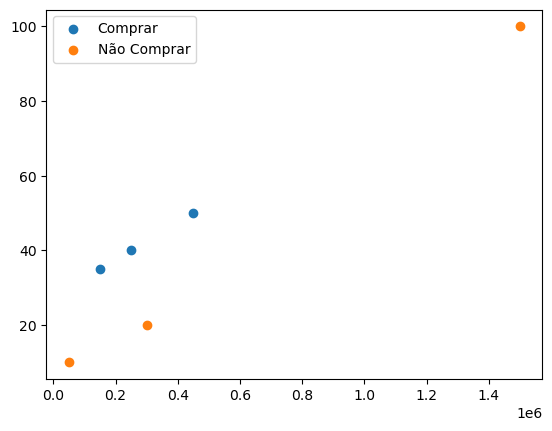

In [27]:
plt.scatter(comprar[:, 0], comprar[:, 1], label="Comprar")
plt.scatter(nao_comprar[:, 0], nao_comprar[:, 1], label="Não Comprar")
plt.legend()

In [28]:
pesos = np.random.random([2])
pesos

array([0.39575034, 0.18650636])

In [59]:
soma = (pesos[0] * casas[1, 0]) + (pesos[1] * casas[1, 1])
soma

19789.382095934165

# Codigo organizado para fazer o calculo dos pesos da rede Perceptron

In [94]:
casas = np.array([ [150000, 35, 1], [50000, 10, 0], [250000, 40, 1], [300000, 20, 0], [450000, 50, 1], [1500000, 100, 0]  ])
casas

array([[ 150000,      35,       1],
       [  50000,      10,       0],
       [ 250000,      40,       1],
       [ 300000,      20,       0],
       [ 450000,      50,       1],
       [1500000,     100,       0]])

In [95]:
criterios_casas = casas[:, 0:2]
criterios_casas

array([[ 150000,      35],
       [  50000,      10],
       [ 250000,      40],
       [ 300000,      20],
       [ 450000,      50],
       [1500000,     100]])

In [96]:
casas_comprar = np.where( casas[:, 2] == 1 )
casas_nao_comprar = np.where( casas[:, 2] == 0 )

comprar = casas[casas_comprar]
nao_comprar = casas[casas_nao_comprar]

In [97]:
def funcao_ativacao( valores ):
    return np.where( valores > 0, 1, 0 )

In [99]:
def fit(X, y, iteracoes=100, taxa_aprendizagem = 0.01):
    # X => Dados de entrada treinamento
    # y => Valores corretos para o treinamento
    _, qtd_criterios = X.shape
    pesos = np.random.random([qtd_criterios])
    print("Pesos iniciais para {} criterios: {}".format(qtd_criterios, pesos))
    for iteracao in range(iteracoes):
        somas = np.dot(X, pesos)
        valores_previstos = funcao_ativacao(somas)
        erros = y - valores_previstos
        # print("Lista de erros: {}".format(erros))
        for indice, erro in enumerate(erros):
            for c in range(qtd_criterios):
                pesos[c] = pesos[c] + (erro * taxa_aprendizagem * X[indice, c])
    return pesos
    
    

In [133]:
p = fit(criterios_casas, casas[:, 2], iteracoes=1000)
p

Pesos iniciais para 2 criterios: [0.23981606 0.8543246 ]


array([-4999.76018394,   447.6043246 ])

In [134]:
valores_aleatorios = np.random.randint(50000, high=2000000, size=(10,))

In [135]:
metragens_aleatorias = np.random.randint(10, high=200, size=(10,))

In [150]:
teste = np.vstack([valores_aleatorios, metragens_aleatorias]).T
teste

array([[1671789,      69],
       [1955543,     179],
       [1687174,      98],
       [ 818125,      84],
       [ 486308,     128],
       [1525974,     178],
       [  86323,      54],
       [ 961064,     106],
       [ 744363,      60],
       [1379283,      35]])

In [151]:
def predict(X, pesos):
    somas = np.dot(X, pesos)
    valores_previstos = funcao_ativacao(somas)
    return valores_previstos

In [152]:
resultado = predict(teste, p)
resultado

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [153]:
resultado_final = np.vstack([valores_aleatorios, metragens_aleatorias, resultado]).T
resultado_final

array([[1671789,      69,       0],
       [1955543,     179,       0],
       [1687174,      98,       0],
       [ 818125,      84,       0],
       [ 486308,     128,       0],
       [1525974,     178,       0],
       [  86323,      54,       0],
       [ 961064,     106,       0],
       [ 744363,      60,       0],
       [1379283,      35,       0]])

In [154]:
casas_teste_comprar = np.where( resultado_final[:, 2] == 1 )
casas_teste_nao_comprar = np.where( resultado_final[:, 2] == 0 )

comprar_teste = resultado_final[casas_teste_comprar]
nao_comprar_teste = resultado_final[casas_teste_nao_comprar]

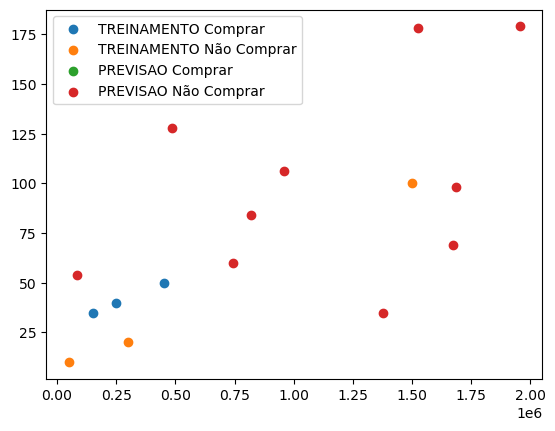

In [155]:
plt.scatter(comprar[:, 0], comprar[:, 1], label="TREINAMENTO Comprar")
plt.scatter(nao_comprar[:, 0], nao_comprar[:, 1], label="TREINAMENTO Não Comprar")
plt.scatter(comprar_teste[:, 0], comprar_teste[:, 1], label="PREVISAO Comprar")
plt.scatter(nao_comprar_teste[:, 0], nao_comprar_teste[:, 1], label="PREVISAO Não Comprar")
plt.legend()